# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
#dataset_train.head(50)
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 110, batch_size = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/110
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0264
Epoch 2/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 3/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 4/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 5/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 6/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0031
Epoch 7/110
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0026
Epoch 8/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 9/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0024
Epoch 10/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 11/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 12/110
1198/1198 [==

1198/1198 [==============================] - 6s 5ms/step - loss: 9.1827e-04
Epoch 94/110
1198/1198 [==============================] - 6s 5ms/step - loss: 8.5142e-04
Epoch 95/110
1198/1198 [==============================] - 6s 5ms/step - loss: 7.8343e-04
Epoch 96/110
1198/1198 [==============================] - 6s 5ms/step - loss: 8.9345e-04
Epoch 97/110
1198/1198 [==============================] - 7s 6ms/step - loss: 9.3962e-04
Epoch 98/110
1198/1198 [==============================] - 6s 5ms/step - loss: 9.0758e-04
Epoch 99/110
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 100/110
1198/1198 [==============================] - 7s 6ms/step - loss: 9.2879e-04
Epoch 101/110
1198/1198 [==============================] - 6s 5ms/step - loss: 9.0668e-04
Epoch 102/110
1198/1198 [==============================] - 6s 5ms/step - loss: 8.7128e-04
Epoch 103/110
1198/1198 [==============================] - 6s 5ms/step - loss: 7.5867e-04
Epoch 104/110
1198/1198 [=========

In [7]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

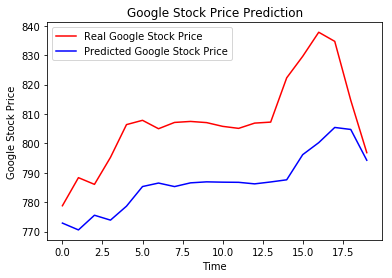

In [8]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM